In [1]:
import pandas as pd
df = pd.read_csv('3dni_pogoda.csv')
df.index = df['Data czas']
df.drop(columns='Data czas', inplace = True)
df.head()

,Energia(t-3),Temp_zewn(t-3),V_wiatru(t-3),Wilg(t-3),Zachm(t-3),Energia(t-2),Temp_zewn(t-2),V_wiatru(t-2),Wilg(t-2),Zachm(t-2),...,Wilg(t-1),Zachm(t-1),Energia(t),Temp_zewn(t),V_wiatru(t),Wilg(t),Zachm(t),Dlug_dnia,Typ_dnia,Pora_roku
Data czas,,,,,,,,,,,,,,,,,,,,,
2016-01-04,93506.054,-3.691304,3.260870,78.565217,7.304348,112776.240,-9.341667,4.416667,70.083333,1.416667,...,68.458333,0.041667,125575.794,-9.908333,3.750000,55.125000,0.000000,7.517,1.0,4.0
2016-01-05,112776.240,-9.341667,4.416667,70.083333,1.416667,122962.116,-11.200000,3.708333,68.458333,0.041667,...,55.125000,0.000000,131745.917,-10.616667,1.916667,61.916667,1.333333,7.550,1.0,4.0
2016-01-06,122962.116,-11.200000,3.708333,68.458333,0.041667,125575.794,-9.908333,3.750000,55.125000,0.000000,...,61.916667,1.333333,135885.442,-11.320833,1.583333,77.583333,0.125000,7.583,5.0,4.0
2016-01-07,125575.794,-9.908333,3.750000,55.125000,0.000000,131745.917,-10.616667,1.916667,61.916667,1.333333,...,77.583333,0.125000,129980.459,-7.220833,2.791667,69.541667,5.916667,7.600,1.0,4.0
2016-01-08,131745.917,-10.616667,1.916667,61.916667,1.333333,135885.442,-11.320833,1.583333,77.583333,0.125000,...,69.541667,5.916667,113582.531,-1.837500,3.916667,90.416667,7.958333,7.650,2.0,4.0


In [2]:
X = df.drop('Energia(t)', axis=1)
y = df['Energia(t)']

In [3]:
X_train, X_test, y_train, y_test = X[:'2017-10-01'], X['2017-10-01':] ,y[:'2017-10-01'] ,y['2017-10-01':]

In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(X_train)
scaler.fit(X_test)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [5]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, explained_variance_score
import numpy as np

#alphas = np.logspace(-5, 5, 6)
momentums = range(1, 10, 1)
learning_rates = range(5, 30)

regressors = []
names = []

for lr in learning_rates:
    for m in momentums:
        regressors.append(MLPRegressor(hidden_layer_sizes=(33, 33, 33),max_iter=500,
                                       shuffle=False,
                                       activation='relu',
                                       alpha=100000, random_state=1,
                                       momentum=m/10,learning_rate_init=lr/10000))
        names.append('momentum {}, learning rate {}'.format(m/10, lr/10000))

for name, regressor in zip(names, regressors):
    regressor.fit(X_train,y_train)
    y_p = regressor.predict(X_test)
    print('Alpha {} R2 score: {}'.format(name, explained_variance_score(y_test, y_p)))
    print('Alpha {} mean squered error: {}'.format(name, mean_squared_error(y_test, y_p)))
    print('Alpha {} root mean squered error: {}'.format(name, np.sqrt(mean_squared_error(y_test, y_p))))


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.1, learning rate 0.0005 R2 score: 0.6189995008027414
Alpha momentum 0.1, learning rate 0.0005 mean squered error: 969010879.8960878
Alpha momentum 0.1, learning rate 0.0005 root mean squered error: 31128.93958836516


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.2, learning rate 0.0005 R2 score: 0.6189995008027414
Alpha momentum 0.2, learning rate 0.0005 mean squered error: 969010879.8960878
Alpha momentum 0.2, learning rate 0.0005 root mean squered error: 31128.93958836516


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.3, learning rate 0.0005 R2 score: 0.6189995008027414
Alpha momentum 0.3, learning rate 0.0005 mean squered error: 969010879.8960878
Alpha momentum 0.3, learning rate 0.0005 root mean squered error: 31128.93958836516


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.4, learning rate 0.0005 R2 score: 0.6189995008027414
Alpha momentum 0.4, learning rate 0.0005 mean squered error: 969010879.8960878
Alpha momentum 0.4, learning rate 0.0005 root mean squered error: 31128.93958836516


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.5, learning rate 0.0005 R2 score: 0.6189995008027414
Alpha momentum 0.5, learning rate 0.0005 mean squered error: 969010879.8960878
Alpha momentum 0.5, learning rate 0.0005 root mean squered error: 31128.93958836516


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.6, learning rate 0.0005 R2 score: 0.6189995008027414
Alpha momentum 0.6, learning rate 0.0005 mean squered error: 969010879.8960878
Alpha momentum 0.6, learning rate 0.0005 root mean squered error: 31128.93958836516


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.7, learning rate 0.0005 R2 score: 0.6189995008027414
Alpha momentum 0.7, learning rate 0.0005 mean squered error: 969010879.8960878
Alpha momentum 0.7, learning rate 0.0005 root mean squered error: 31128.93958836516


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.8, learning rate 0.0005 R2 score: 0.6189995008027414
Alpha momentum 0.8, learning rate 0.0005 mean squered error: 969010879.8960878
Alpha momentum 0.8, learning rate 0.0005 root mean squered error: 31128.93958836516


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.9, learning rate 0.0005 R2 score: 0.6189995008027414
Alpha momentum 0.9, learning rate 0.0005 mean squered error: 969010879.8960878
Alpha momentum 0.9, learning rate 0.0005 root mean squered error: 31128.93958836516


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.1, learning rate 0.0006 R2 score: 0.6047222186696015
Alpha momentum 0.1, learning rate 0.0006 mean squered error: 822540990.2531593
Alpha momentum 0.1, learning rate 0.0006 root mean squered error: 28679.975422813026


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.2, learning rate 0.0006 R2 score: 0.6047222186696015
Alpha momentum 0.2, learning rate 0.0006 mean squered error: 822540990.2531593
Alpha momentum 0.2, learning rate 0.0006 root mean squered error: 28679.975422813026


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.3, learning rate 0.0006 R2 score: 0.6047222186696015
Alpha momentum 0.3, learning rate 0.0006 mean squered error: 822540990.2531593
Alpha momentum 0.3, learning rate 0.0006 root mean squered error: 28679.975422813026


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.4, learning rate 0.0006 R2 score: 0.6047222186696015
Alpha momentum 0.4, learning rate 0.0006 mean squered error: 822540990.2531593
Alpha momentum 0.4, learning rate 0.0006 root mean squered error: 28679.975422813026


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.5, learning rate 0.0006 R2 score: 0.6047222186696015
Alpha momentum 0.5, learning rate 0.0006 mean squered error: 822540990.2531593
Alpha momentum 0.5, learning rate 0.0006 root mean squered error: 28679.975422813026


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.6, learning rate 0.0006 R2 score: 0.6047222186696015
Alpha momentum 0.6, learning rate 0.0006 mean squered error: 822540990.2531593
Alpha momentum 0.6, learning rate 0.0006 root mean squered error: 28679.975422813026


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.7, learning rate 0.0006 R2 score: 0.6047222186696015
Alpha momentum 0.7, learning rate 0.0006 mean squered error: 822540990.2531593
Alpha momentum 0.7, learning rate 0.0006 root mean squered error: 28679.975422813026


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.8, learning rate 0.0006 R2 score: 0.6047222186696015
Alpha momentum 0.8, learning rate 0.0006 mean squered error: 822540990.2531593
Alpha momentum 0.8, learning rate 0.0006 root mean squered error: 28679.975422813026


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.9, learning rate 0.0006 R2 score: 0.6047222186696015
Alpha momentum 0.9, learning rate 0.0006 mean squered error: 822540990.2531593
Alpha momentum 0.9, learning rate 0.0006 root mean squered error: 28679.975422813026


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.1, learning rate 0.0007 R2 score: 0.6026663758946051
Alpha momentum 0.1, learning rate 0.0007 mean squered error: 682868065.9587711
Alpha momentum 0.1, learning rate 0.0007 root mean squered error: 26131.744410941476


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.2, learning rate 0.0007 R2 score: 0.6026663758946051
Alpha momentum 0.2, learning rate 0.0007 mean squered error: 682868065.9587711
Alpha momentum 0.2, learning rate 0.0007 root mean squered error: 26131.744410941476


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.3, learning rate 0.0007 R2 score: 0.6026663758946051
Alpha momentum 0.3, learning rate 0.0007 mean squered error: 682868065.9587711
Alpha momentum 0.3, learning rate 0.0007 root mean squered error: 26131.744410941476


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.4, learning rate 0.0007 R2 score: 0.6026663758946051
Alpha momentum 0.4, learning rate 0.0007 mean squered error: 682868065.9587711
Alpha momentum 0.4, learning rate 0.0007 root mean squered error: 26131.744410941476


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.5, learning rate 0.0007 R2 score: 0.6026663758946051
Alpha momentum 0.5, learning rate 0.0007 mean squered error: 682868065.9587711
Alpha momentum 0.5, learning rate 0.0007 root mean squered error: 26131.744410941476


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.6, learning rate 0.0007 R2 score: 0.6026663758946051
Alpha momentum 0.6, learning rate 0.0007 mean squered error: 682868065.9587711
Alpha momentum 0.6, learning rate 0.0007 root mean squered error: 26131.744410941476


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.7, learning rate 0.0007 R2 score: 0.6026663758946051
Alpha momentum 0.7, learning rate 0.0007 mean squered error: 682868065.9587711
Alpha momentum 0.7, learning rate 0.0007 root mean squered error: 26131.744410941476


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.8, learning rate 0.0007 R2 score: 0.6026663758946051
Alpha momentum 0.8, learning rate 0.0007 mean squered error: 682868065.9587711
Alpha momentum 0.8, learning rate 0.0007 root mean squered error: 26131.744410941476


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.9, learning rate 0.0007 R2 score: 0.6026663758946051
Alpha momentum 0.9, learning rate 0.0007 mean squered error: 682868065.9587711
Alpha momentum 0.9, learning rate 0.0007 root mean squered error: 26131.744410941476


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.1, learning rate 0.0008 R2 score: 0.6226446536094672
Alpha momentum 0.1, learning rate 0.0008 mean squered error: 545276019.977294
Alpha momentum 0.1, learning rate 0.0008 root mean squered error: 23351.1460099348


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.2, learning rate 0.0008 R2 score: 0.6226446536094672
Alpha momentum 0.2, learning rate 0.0008 mean squered error: 545276019.977294
Alpha momentum 0.2, learning rate 0.0008 root mean squered error: 23351.1460099348


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.3, learning rate 0.0008 R2 score: 0.6226446536094672
Alpha momentum 0.3, learning rate 0.0008 mean squered error: 545276019.977294
Alpha momentum 0.3, learning rate 0.0008 root mean squered error: 23351.1460099348


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.4, learning rate 0.0008 R2 score: 0.6226446536094672
Alpha momentum 0.4, learning rate 0.0008 mean squered error: 545276019.977294
Alpha momentum 0.4, learning rate 0.0008 root mean squered error: 23351.1460099348


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.5, learning rate 0.0008 R2 score: 0.6226446536094672
Alpha momentum 0.5, learning rate 0.0008 mean squered error: 545276019.977294
Alpha momentum 0.5, learning rate 0.0008 root mean squered error: 23351.1460099348


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.6, learning rate 0.0008 R2 score: 0.6226446536094672
Alpha momentum 0.6, learning rate 0.0008 mean squered error: 545276019.977294
Alpha momentum 0.6, learning rate 0.0008 root mean squered error: 23351.1460099348


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.7, learning rate 0.0008 R2 score: 0.6226446536094672
Alpha momentum 0.7, learning rate 0.0008 mean squered error: 545276019.977294
Alpha momentum 0.7, learning rate 0.0008 root mean squered error: 23351.1460099348


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.8, learning rate 0.0008 R2 score: 0.6226446536094672
Alpha momentum 0.8, learning rate 0.0008 mean squered error: 545276019.977294
Alpha momentum 0.8, learning rate 0.0008 root mean squered error: 23351.1460099348


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.9, learning rate 0.0008 R2 score: 0.6226446536094672
Alpha momentum 0.9, learning rate 0.0008 mean squered error: 545276019.977294
Alpha momentum 0.9, learning rate 0.0008 root mean squered error: 23351.1460099348


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.1, learning rate 0.0009 R2 score: 0.6607131822413936
Alpha momentum 0.1, learning rate 0.0009 mean squered error: 421603856.07350385
Alpha momentum 0.1, learning rate 0.0009 root mean squered error: 20532.994327995708


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.2, learning rate 0.0009 R2 score: 0.6607131822413936
Alpha momentum 0.2, learning rate 0.0009 mean squered error: 421603856.07350385
Alpha momentum 0.2, learning rate 0.0009 root mean squered error: 20532.994327995708


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.3, learning rate 0.0009 R2 score: 0.6607131822413936
Alpha momentum 0.3, learning rate 0.0009 mean squered error: 421603856.07350385
Alpha momentum 0.3, learning rate 0.0009 root mean squered error: 20532.994327995708


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.4, learning rate 0.0009 R2 score: 0.6607131822413936
Alpha momentum 0.4, learning rate 0.0009 mean squered error: 421603856.07350385
Alpha momentum 0.4, learning rate 0.0009 root mean squered error: 20532.994327995708


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.5, learning rate 0.0009 R2 score: 0.6607131822413936
Alpha momentum 0.5, learning rate 0.0009 mean squered error: 421603856.07350385
Alpha momentum 0.5, learning rate 0.0009 root mean squered error: 20532.994327995708


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.6, learning rate 0.0009 R2 score: 0.6607131822413936
Alpha momentum 0.6, learning rate 0.0009 mean squered error: 421603856.07350385
Alpha momentum 0.6, learning rate 0.0009 root mean squered error: 20532.994327995708


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.7, learning rate 0.0009 R2 score: 0.6607131822413936
Alpha momentum 0.7, learning rate 0.0009 mean squered error: 421603856.07350385
Alpha momentum 0.7, learning rate 0.0009 root mean squered error: 20532.994327995708


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.8, learning rate 0.0009 R2 score: 0.6607131822413936
Alpha momentum 0.8, learning rate 0.0009 mean squered error: 421603856.07350385
Alpha momentum 0.8, learning rate 0.0009 root mean squered error: 20532.994327995708


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.9, learning rate 0.0009 R2 score: 0.6607131822413936
Alpha momentum 0.9, learning rate 0.0009 mean squered error: 421603856.07350385
Alpha momentum 0.9, learning rate 0.0009 root mean squered error: 20532.994327995708


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.1, learning rate 0.001 R2 score: 0.6997099118278964
Alpha momentum 0.1, learning rate 0.001 mean squered error: 323278845.3489531
Alpha momentum 0.1, learning rate 0.001 root mean squered error: 17979.95676716029


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.2, learning rate 0.001 R2 score: 0.6997099118278964
Alpha momentum 0.2, learning rate 0.001 mean squered error: 323278845.3489531
Alpha momentum 0.2, learning rate 0.001 root mean squered error: 17979.95676716029


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.3, learning rate 0.001 R2 score: 0.6997099118278964
Alpha momentum 0.3, learning rate 0.001 mean squered error: 323278845.3489531
Alpha momentum 0.3, learning rate 0.001 root mean squered error: 17979.95676716029


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.4, learning rate 0.001 R2 score: 0.6997099118278964
Alpha momentum 0.4, learning rate 0.001 mean squered error: 323278845.3489531
Alpha momentum 0.4, learning rate 0.001 root mean squered error: 17979.95676716029


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.5, learning rate 0.001 R2 score: 0.6997099118278964
Alpha momentum 0.5, learning rate 0.001 mean squered error: 323278845.3489531
Alpha momentum 0.5, learning rate 0.001 root mean squered error: 17979.95676716029


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.6, learning rate 0.001 R2 score: 0.6997099118278964
Alpha momentum 0.6, learning rate 0.001 mean squered error: 323278845.3489531
Alpha momentum 0.6, learning rate 0.001 root mean squered error: 17979.95676716029


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.7, learning rate 0.001 R2 score: 0.6997099118278964
Alpha momentum 0.7, learning rate 0.001 mean squered error: 323278845.3489531
Alpha momentum 0.7, learning rate 0.001 root mean squered error: 17979.95676716029


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.8, learning rate 0.001 R2 score: 0.6997099118278964
Alpha momentum 0.8, learning rate 0.001 mean squered error: 323278845.3489531
Alpha momentum 0.8, learning rate 0.001 root mean squered error: 17979.95676716029


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.9, learning rate 0.001 R2 score: 0.6997099118278964
Alpha momentum 0.9, learning rate 0.001 mean squered error: 323278845.3489531
Alpha momentum 0.9, learning rate 0.001 root mean squered error: 17979.95676716029


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.1, learning rate 0.0011 R2 score: 0.7303823091211381
Alpha momentum 0.1, learning rate 0.0011 mean squered error: 251345399.8961462
Alpha momentum 0.1, learning rate 0.0011 root mean squered error: 15853.876494288272


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.2, learning rate 0.0011 R2 score: 0.7303823091211381
Alpha momentum 0.2, learning rate 0.0011 mean squered error: 251345399.8961462
Alpha momentum 0.2, learning rate 0.0011 root mean squered error: 15853.876494288272


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.3, learning rate 0.0011 R2 score: 0.7303823091211381
Alpha momentum 0.3, learning rate 0.0011 mean squered error: 251345399.8961462
Alpha momentum 0.3, learning rate 0.0011 root mean squered error: 15853.876494288272


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.4, learning rate 0.0011 R2 score: 0.7303823091211381
Alpha momentum 0.4, learning rate 0.0011 mean squered error: 251345399.8961462
Alpha momentum 0.4, learning rate 0.0011 root mean squered error: 15853.876494288272


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.5, learning rate 0.0011 R2 score: 0.7303823091211381
Alpha momentum 0.5, learning rate 0.0011 mean squered error: 251345399.8961462
Alpha momentum 0.5, learning rate 0.0011 root mean squered error: 15853.876494288272


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.6, learning rate 0.0011 R2 score: 0.7303823091211381
Alpha momentum 0.6, learning rate 0.0011 mean squered error: 251345399.8961462
Alpha momentum 0.6, learning rate 0.0011 root mean squered error: 15853.876494288272


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.7, learning rate 0.0011 R2 score: 0.7303823091211381
Alpha momentum 0.7, learning rate 0.0011 mean squered error: 251345399.8961462
Alpha momentum 0.7, learning rate 0.0011 root mean squered error: 15853.876494288272


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.8, learning rate 0.0011 R2 score: 0.7303823091211381
Alpha momentum 0.8, learning rate 0.0011 mean squered error: 251345399.8961462
Alpha momentum 0.8, learning rate 0.0011 root mean squered error: 15853.876494288272


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.9, learning rate 0.0011 R2 score: 0.7303823091211381
Alpha momentum 0.9, learning rate 0.0011 mean squered error: 251345399.8961462
Alpha momentum 0.9, learning rate 0.0011 root mean squered error: 15853.876494288272


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.1, learning rate 0.0012 R2 score: 0.7588208061385604
Alpha momentum 0.1, learning rate 0.0012 mean squered error: 198778496.118557
Alpha momentum 0.1, learning rate 0.0012 root mean squered error: 14098.882796823194


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.2, learning rate 0.0012 R2 score: 0.7588208061385604
Alpha momentum 0.2, learning rate 0.0012 mean squered error: 198778496.118557
Alpha momentum 0.2, learning rate 0.0012 root mean squered error: 14098.882796823194


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.3, learning rate 0.0012 R2 score: 0.7588208061385604
Alpha momentum 0.3, learning rate 0.0012 mean squered error: 198778496.118557
Alpha momentum 0.3, learning rate 0.0012 root mean squered error: 14098.882796823194


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.4, learning rate 0.0012 R2 score: 0.7588208061385604
Alpha momentum 0.4, learning rate 0.0012 mean squered error: 198778496.118557
Alpha momentum 0.4, learning rate 0.0012 root mean squered error: 14098.882796823194


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.5, learning rate 0.0012 R2 score: 0.7588208061385604
Alpha momentum 0.5, learning rate 0.0012 mean squered error: 198778496.118557
Alpha momentum 0.5, learning rate 0.0012 root mean squered error: 14098.882796823194


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.6, learning rate 0.0012 R2 score: 0.7588208061385604
Alpha momentum 0.6, learning rate 0.0012 mean squered error: 198778496.118557
Alpha momentum 0.6, learning rate 0.0012 root mean squered error: 14098.882796823194


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.7, learning rate 0.0012 R2 score: 0.7588208061385604
Alpha momentum 0.7, learning rate 0.0012 mean squered error: 198778496.118557
Alpha momentum 0.7, learning rate 0.0012 root mean squered error: 14098.882796823194


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.8, learning rate 0.0012 R2 score: 0.7588208061385604
Alpha momentum 0.8, learning rate 0.0012 mean squered error: 198778496.118557
Alpha momentum 0.8, learning rate 0.0012 root mean squered error: 14098.882796823194


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.9, learning rate 0.0012 R2 score: 0.7588208061385604
Alpha momentum 0.9, learning rate 0.0012 mean squered error: 198778496.118557
Alpha momentum 0.9, learning rate 0.0012 root mean squered error: 14098.882796823194


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.1, learning rate 0.0013 R2 score: 0.7846220862757642
Alpha momentum 0.1, learning rate 0.0013 mean squered error: 158010900.1666823
Alpha momentum 0.1, learning rate 0.0013 root mean squered error: 12570.238667848846


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.2, learning rate 0.0013 R2 score: 0.7846220862757642
Alpha momentum 0.2, learning rate 0.0013 mean squered error: 158010900.1666823
Alpha momentum 0.2, learning rate 0.0013 root mean squered error: 12570.238667848846


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.3, learning rate 0.0013 R2 score: 0.7846220862757642
Alpha momentum 0.3, learning rate 0.0013 mean squered error: 158010900.1666823
Alpha momentum 0.3, learning rate 0.0013 root mean squered error: 12570.238667848846


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.4, learning rate 0.0013 R2 score: 0.7846220862757642
Alpha momentum 0.4, learning rate 0.0013 mean squered error: 158010900.1666823
Alpha momentum 0.4, learning rate 0.0013 root mean squered error: 12570.238667848846


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.5, learning rate 0.0013 R2 score: 0.7846220862757642
Alpha momentum 0.5, learning rate 0.0013 mean squered error: 158010900.1666823
Alpha momentum 0.5, learning rate 0.0013 root mean squered error: 12570.238667848846


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.6, learning rate 0.0013 R2 score: 0.7846220862757642
Alpha momentum 0.6, learning rate 0.0013 mean squered error: 158010900.1666823
Alpha momentum 0.6, learning rate 0.0013 root mean squered error: 12570.238667848846


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.7, learning rate 0.0013 R2 score: 0.7846220862757642
Alpha momentum 0.7, learning rate 0.0013 mean squered error: 158010900.1666823
Alpha momentum 0.7, learning rate 0.0013 root mean squered error: 12570.238667848846


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.8, learning rate 0.0013 R2 score: 0.7846220862757642
Alpha momentum 0.8, learning rate 0.0013 mean squered error: 158010900.1666823
Alpha momentum 0.8, learning rate 0.0013 root mean squered error: 12570.238667848846


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.9, learning rate 0.0013 R2 score: 0.7846220862757642
Alpha momentum 0.9, learning rate 0.0013 mean squered error: 158010900.1666823
Alpha momentum 0.9, learning rate 0.0013 root mean squered error: 12570.238667848846


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.1, learning rate 0.0014 R2 score: 0.8094222397253642
Alpha momentum 0.1, learning rate 0.0014 mean squered error: 129764703.02240717
Alpha momentum 0.1, learning rate 0.0014 root mean squered error: 11391.431122664402


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.2, learning rate 0.0014 R2 score: 0.8094222397253642
Alpha momentum 0.2, learning rate 0.0014 mean squered error: 129764703.02240717
Alpha momentum 0.2, learning rate 0.0014 root mean squered error: 11391.431122664402


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.3, learning rate 0.0014 R2 score: 0.8094222397253642
Alpha momentum 0.3, learning rate 0.0014 mean squered error: 129764703.02240717
Alpha momentum 0.3, learning rate 0.0014 root mean squered error: 11391.431122664402


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.4, learning rate 0.0014 R2 score: 0.8094222397253642
Alpha momentum 0.4, learning rate 0.0014 mean squered error: 129764703.02240717
Alpha momentum 0.4, learning rate 0.0014 root mean squered error: 11391.431122664402


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.5, learning rate 0.0014 R2 score: 0.8094222397253642
Alpha momentum 0.5, learning rate 0.0014 mean squered error: 129764703.02240717
Alpha momentum 0.5, learning rate 0.0014 root mean squered error: 11391.431122664402


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.6, learning rate 0.0014 R2 score: 0.8094222397253642
Alpha momentum 0.6, learning rate 0.0014 mean squered error: 129764703.02240717
Alpha momentum 0.6, learning rate 0.0014 root mean squered error: 11391.431122664402


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.7, learning rate 0.0014 R2 score: 0.8094222397253642
Alpha momentum 0.7, learning rate 0.0014 mean squered error: 129764703.02240717
Alpha momentum 0.7, learning rate 0.0014 root mean squered error: 11391.431122664402


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.8, learning rate 0.0014 R2 score: 0.8094222397253642
Alpha momentum 0.8, learning rate 0.0014 mean squered error: 129764703.02240717
Alpha momentum 0.8, learning rate 0.0014 root mean squered error: 11391.431122664402


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.9, learning rate 0.0014 R2 score: 0.8094222397253642
Alpha momentum 0.9, learning rate 0.0014 mean squered error: 129764703.02240717
Alpha momentum 0.9, learning rate 0.0014 root mean squered error: 11391.431122664402


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.1, learning rate 0.0015 R2 score: 0.8293032692779945
Alpha momentum 0.1, learning rate 0.0015 mean squered error: 108297308.10295677
Alpha momentum 0.1, learning rate 0.0015 root mean squered error: 10406.599257344196


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.2, learning rate 0.0015 R2 score: 0.8293032692779945
Alpha momentum 0.2, learning rate 0.0015 mean squered error: 108297308.10295677
Alpha momentum 0.2, learning rate 0.0015 root mean squered error: 10406.599257344196


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.3, learning rate 0.0015 R2 score: 0.8293032692779945
Alpha momentum 0.3, learning rate 0.0015 mean squered error: 108297308.10295677
Alpha momentum 0.3, learning rate 0.0015 root mean squered error: 10406.599257344196


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.4, learning rate 0.0015 R2 score: 0.8293032692779945
Alpha momentum 0.4, learning rate 0.0015 mean squered error: 108297308.10295677
Alpha momentum 0.4, learning rate 0.0015 root mean squered error: 10406.599257344196


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.5, learning rate 0.0015 R2 score: 0.8293032692779945
Alpha momentum 0.5, learning rate 0.0015 mean squered error: 108297308.10295677
Alpha momentum 0.5, learning rate 0.0015 root mean squered error: 10406.599257344196


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.6, learning rate 0.0015 R2 score: 0.8293032692779945
Alpha momentum 0.6, learning rate 0.0015 mean squered error: 108297308.10295677
Alpha momentum 0.6, learning rate 0.0015 root mean squered error: 10406.599257344196


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.7, learning rate 0.0015 R2 score: 0.8293032692779945
Alpha momentum 0.7, learning rate 0.0015 mean squered error: 108297308.10295677
Alpha momentum 0.7, learning rate 0.0015 root mean squered error: 10406.599257344196


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.8, learning rate 0.0015 R2 score: 0.8293032692779945
Alpha momentum 0.8, learning rate 0.0015 mean squered error: 108297308.10295677
Alpha momentum 0.8, learning rate 0.0015 root mean squered error: 10406.599257344196


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.9, learning rate 0.0015 R2 score: 0.8293032692779945
Alpha momentum 0.9, learning rate 0.0015 mean squered error: 108297308.10295677
Alpha momentum 0.9, learning rate 0.0015 root mean squered error: 10406.599257344196


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.1, learning rate 0.0016 R2 score: 0.8530349022098523
Alpha momentum 0.1, learning rate 0.0016 mean squered error: 88197566.08069088
Alpha momentum 0.1, learning rate 0.0016 root mean squered error: 9391.355923437834


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.2, learning rate 0.0016 R2 score: 0.8530349022098523
Alpha momentum 0.2, learning rate 0.0016 mean squered error: 88197566.08069088
Alpha momentum 0.2, learning rate 0.0016 root mean squered error: 9391.355923437834


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.3, learning rate 0.0016 R2 score: 0.8530349022098523
Alpha momentum 0.3, learning rate 0.0016 mean squered error: 88197566.08069088
Alpha momentum 0.3, learning rate 0.0016 root mean squered error: 9391.355923437834


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.4, learning rate 0.0016 R2 score: 0.8530349022098523
Alpha momentum 0.4, learning rate 0.0016 mean squered error: 88197566.08069088
Alpha momentum 0.4, learning rate 0.0016 root mean squered error: 9391.355923437834


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.5, learning rate 0.0016 R2 score: 0.8530349022098523
Alpha momentum 0.5, learning rate 0.0016 mean squered error: 88197566.08069088
Alpha momentum 0.5, learning rate 0.0016 root mean squered error: 9391.355923437834


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.6, learning rate 0.0016 R2 score: 0.8530349022098523
Alpha momentum 0.6, learning rate 0.0016 mean squered error: 88197566.08069088
Alpha momentum 0.6, learning rate 0.0016 root mean squered error: 9391.355923437834


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.7, learning rate 0.0016 R2 score: 0.8530349022098523
Alpha momentum 0.7, learning rate 0.0016 mean squered error: 88197566.08069088
Alpha momentum 0.7, learning rate 0.0016 root mean squered error: 9391.355923437834


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.8, learning rate 0.0016 R2 score: 0.8530349022098523
Alpha momentum 0.8, learning rate 0.0016 mean squered error: 88197566.08069088
Alpha momentum 0.8, learning rate 0.0016 root mean squered error: 9391.355923437834


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.9, learning rate 0.0016 R2 score: 0.8530349022098523
Alpha momentum 0.9, learning rate 0.0016 mean squered error: 88197566.08069088
Alpha momentum 0.9, learning rate 0.0016 root mean squered error: 9391.355923437834


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.1, learning rate 0.0017 R2 score: 0.8671404422705598
Alpha momentum 0.1, learning rate 0.0017 mean squered error: 76202879.71009506
Alpha momentum 0.1, learning rate 0.0017 root mean squered error: 8729.426081369556


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.2, learning rate 0.0017 R2 score: 0.8671404422705598
Alpha momentum 0.2, learning rate 0.0017 mean squered error: 76202879.71009506
Alpha momentum 0.2, learning rate 0.0017 root mean squered error: 8729.426081369556


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.3, learning rate 0.0017 R2 score: 0.8671404422705598
Alpha momentum 0.3, learning rate 0.0017 mean squered error: 76202879.71009506
Alpha momentum 0.3, learning rate 0.0017 root mean squered error: 8729.426081369556


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.4, learning rate 0.0017 R2 score: 0.8671404422705598
Alpha momentum 0.4, learning rate 0.0017 mean squered error: 76202879.71009506
Alpha momentum 0.4, learning rate 0.0017 root mean squered error: 8729.426081369556


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.5, learning rate 0.0017 R2 score: 0.8671404422705598
Alpha momentum 0.5, learning rate 0.0017 mean squered error: 76202879.71009506
Alpha momentum 0.5, learning rate 0.0017 root mean squered error: 8729.426081369556


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.6, learning rate 0.0017 R2 score: 0.8671404422705598
Alpha momentum 0.6, learning rate 0.0017 mean squered error: 76202879.71009506
Alpha momentum 0.6, learning rate 0.0017 root mean squered error: 8729.426081369556


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.7, learning rate 0.0017 R2 score: 0.8671404422705598
Alpha momentum 0.7, learning rate 0.0017 mean squered error: 76202879.71009506
Alpha momentum 0.7, learning rate 0.0017 root mean squered error: 8729.426081369556


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.8, learning rate 0.0017 R2 score: 0.8671404422705598
Alpha momentum 0.8, learning rate 0.0017 mean squered error: 76202879.71009506
Alpha momentum 0.8, learning rate 0.0017 root mean squered error: 8729.426081369556


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.9, learning rate 0.0017 R2 score: 0.8671404422705598
Alpha momentum 0.9, learning rate 0.0017 mean squered error: 76202879.71009506
Alpha momentum 0.9, learning rate 0.0017 root mean squered error: 8729.426081369556


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.1, learning rate 0.0018 R2 score: 0.8796534296147481
Alpha momentum 0.1, learning rate 0.0018 mean squered error: 65235458.116557226
Alpha momentum 0.1, learning rate 0.0018 root mean squered error: 8076.847040557177


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.2, learning rate 0.0018 R2 score: 0.8796534296147481
Alpha momentum 0.2, learning rate 0.0018 mean squered error: 65235458.116557226
Alpha momentum 0.2, learning rate 0.0018 root mean squered error: 8076.847040557177


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.3, learning rate 0.0018 R2 score: 0.8796534296147481
Alpha momentum 0.3, learning rate 0.0018 mean squered error: 65235458.116557226
Alpha momentum 0.3, learning rate 0.0018 root mean squered error: 8076.847040557177


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.4, learning rate 0.0018 R2 score: 0.8796534296147481
Alpha momentum 0.4, learning rate 0.0018 mean squered error: 65235458.116557226
Alpha momentum 0.4, learning rate 0.0018 root mean squered error: 8076.847040557177


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.5, learning rate 0.0018 R2 score: 0.8796534296147481
Alpha momentum 0.5, learning rate 0.0018 mean squered error: 65235458.116557226
Alpha momentum 0.5, learning rate 0.0018 root mean squered error: 8076.847040557177


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.6, learning rate 0.0018 R2 score: 0.8796534296147481
Alpha momentum 0.6, learning rate 0.0018 mean squered error: 65235458.116557226
Alpha momentum 0.6, learning rate 0.0018 root mean squered error: 8076.847040557177


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.7, learning rate 0.0018 R2 score: 0.8796534296147481
Alpha momentum 0.7, learning rate 0.0018 mean squered error: 65235458.116557226
Alpha momentum 0.7, learning rate 0.0018 root mean squered error: 8076.847040557177


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.8, learning rate 0.0018 R2 score: 0.8796534296147481
Alpha momentum 0.8, learning rate 0.0018 mean squered error: 65235458.116557226
Alpha momentum 0.8, learning rate 0.0018 root mean squered error: 8076.847040557177


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.9, learning rate 0.0018 R2 score: 0.8796534296147481
Alpha momentum 0.9, learning rate 0.0018 mean squered error: 65235458.116557226
Alpha momentum 0.9, learning rate 0.0018 root mean squered error: 8076.847040557177


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.1, learning rate 0.0019 R2 score: 0.8930829855866506
Alpha momentum 0.1, learning rate 0.0019 mean squered error: 56934384.67845316
Alpha momentum 0.1, learning rate 0.0019 root mean squered error: 7545.487703154327


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.2, learning rate 0.0019 R2 score: 0.8930829855866506
Alpha momentum 0.2, learning rate 0.0019 mean squered error: 56934384.67845316
Alpha momentum 0.2, learning rate 0.0019 root mean squered error: 7545.487703154327


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.3, learning rate 0.0019 R2 score: 0.8930829855866506
Alpha momentum 0.3, learning rate 0.0019 mean squered error: 56934384.67845316
Alpha momentum 0.3, learning rate 0.0019 root mean squered error: 7545.487703154327


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.4, learning rate 0.0019 R2 score: 0.8930829855866506
Alpha momentum 0.4, learning rate 0.0019 mean squered error: 56934384.67845316
Alpha momentum 0.4, learning rate 0.0019 root mean squered error: 7545.487703154327


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.5, learning rate 0.0019 R2 score: 0.8930829855866506
Alpha momentum 0.5, learning rate 0.0019 mean squered error: 56934384.67845316
Alpha momentum 0.5, learning rate 0.0019 root mean squered error: 7545.487703154327


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.6, learning rate 0.0019 R2 score: 0.8930829855866506
Alpha momentum 0.6, learning rate 0.0019 mean squered error: 56934384.67845316
Alpha momentum 0.6, learning rate 0.0019 root mean squered error: 7545.487703154327


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.7, learning rate 0.0019 R2 score: 0.8930829855866506
Alpha momentum 0.7, learning rate 0.0019 mean squered error: 56934384.67845316
Alpha momentum 0.7, learning rate 0.0019 root mean squered error: 7545.487703154327


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.8, learning rate 0.0019 R2 score: 0.8930829855866506
Alpha momentum 0.8, learning rate 0.0019 mean squered error: 56934384.67845316
Alpha momentum 0.8, learning rate 0.0019 root mean squered error: 7545.487703154327


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.9, learning rate 0.0019 R2 score: 0.8930829855866506
Alpha momentum 0.9, learning rate 0.0019 mean squered error: 56934384.67845316
Alpha momentum 0.9, learning rate 0.0019 root mean squered error: 7545.487703154327


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.1, learning rate 0.002 R2 score: 0.9013944174005497
Alpha momentum 0.1, learning rate 0.002 mean squered error: 52257935.75077795
Alpha momentum 0.1, learning rate 0.002 root mean squered error: 7228.965053918711


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.2, learning rate 0.002 R2 score: 0.9013944174005497
Alpha momentum 0.2, learning rate 0.002 mean squered error: 52257935.75077795
Alpha momentum 0.2, learning rate 0.002 root mean squered error: 7228.965053918711


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.3, learning rate 0.002 R2 score: 0.9013944174005497
Alpha momentum 0.3, learning rate 0.002 mean squered error: 52257935.75077795
Alpha momentum 0.3, learning rate 0.002 root mean squered error: 7228.965053918711


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.4, learning rate 0.002 R2 score: 0.9013944174005497
Alpha momentum 0.4, learning rate 0.002 mean squered error: 52257935.75077795
Alpha momentum 0.4, learning rate 0.002 root mean squered error: 7228.965053918711


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.5, learning rate 0.002 R2 score: 0.9013944174005497
Alpha momentum 0.5, learning rate 0.002 mean squered error: 52257935.75077795
Alpha momentum 0.5, learning rate 0.002 root mean squered error: 7228.965053918711


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.6, learning rate 0.002 R2 score: 0.9013944174005497
Alpha momentum 0.6, learning rate 0.002 mean squered error: 52257935.75077795
Alpha momentum 0.6, learning rate 0.002 root mean squered error: 7228.965053918711


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.7, learning rate 0.002 R2 score: 0.9013944174005497
Alpha momentum 0.7, learning rate 0.002 mean squered error: 52257935.75077795
Alpha momentum 0.7, learning rate 0.002 root mean squered error: 7228.965053918711


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.8, learning rate 0.002 R2 score: 0.9013944174005497
Alpha momentum 0.8, learning rate 0.002 mean squered error: 52257935.75077795
Alpha momentum 0.8, learning rate 0.002 root mean squered error: 7228.965053918711


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.9, learning rate 0.002 R2 score: 0.9013944174005497
Alpha momentum 0.9, learning rate 0.002 mean squered error: 52257935.75077795
Alpha momentum 0.9, learning rate 0.002 root mean squered error: 7228.965053918711


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.1, learning rate 0.0021 R2 score: 0.9081206498638965
Alpha momentum 0.1, learning rate 0.0021 mean squered error: 48679721.461207196
Alpha momentum 0.1, learning rate 0.0021 root mean squered error: 6977.085456063097


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.2, learning rate 0.0021 R2 score: 0.9081206498638965
Alpha momentum 0.2, learning rate 0.0021 mean squered error: 48679721.461207196
Alpha momentum 0.2, learning rate 0.0021 root mean squered error: 6977.085456063097


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.3, learning rate 0.0021 R2 score: 0.9081206498638965
Alpha momentum 0.3, learning rate 0.0021 mean squered error: 48679721.461207196
Alpha momentum 0.3, learning rate 0.0021 root mean squered error: 6977.085456063097


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.4, learning rate 0.0021 R2 score: 0.9081206498638965
Alpha momentum 0.4, learning rate 0.0021 mean squered error: 48679721.461207196
Alpha momentum 0.4, learning rate 0.0021 root mean squered error: 6977.085456063097


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.5, learning rate 0.0021 R2 score: 0.9081206498638965
Alpha momentum 0.5, learning rate 0.0021 mean squered error: 48679721.461207196
Alpha momentum 0.5, learning rate 0.0021 root mean squered error: 6977.085456063097


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.6, learning rate 0.0021 R2 score: 0.9081206498638965
Alpha momentum 0.6, learning rate 0.0021 mean squered error: 48679721.461207196
Alpha momentum 0.6, learning rate 0.0021 root mean squered error: 6977.085456063097


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.7, learning rate 0.0021 R2 score: 0.9081206498638965
Alpha momentum 0.7, learning rate 0.0021 mean squered error: 48679721.461207196
Alpha momentum 0.7, learning rate 0.0021 root mean squered error: 6977.085456063097


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.8, learning rate 0.0021 R2 score: 0.9081206498638965
Alpha momentum 0.8, learning rate 0.0021 mean squered error: 48679721.461207196
Alpha momentum 0.8, learning rate 0.0021 root mean squered error: 6977.085456063097


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.9, learning rate 0.0021 R2 score: 0.9081206498638965
Alpha momentum 0.9, learning rate 0.0021 mean squered error: 48679721.461207196
Alpha momentum 0.9, learning rate 0.0021 root mean squered error: 6977.085456063097


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.1, learning rate 0.0022 R2 score: 0.9131267996433334
Alpha momentum 0.1, learning rate 0.0022 mean squered error: 45032919.38048823
Alpha momentum 0.1, learning rate 0.0022 root mean squered error: 6710.6571496753


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.2, learning rate 0.0022 R2 score: 0.9131267996433334
Alpha momentum 0.2, learning rate 0.0022 mean squered error: 45032919.38048823
Alpha momentum 0.2, learning rate 0.0022 root mean squered error: 6710.6571496753


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.3, learning rate 0.0022 R2 score: 0.9131267996433334
Alpha momentum 0.3, learning rate 0.0022 mean squered error: 45032919.38048823
Alpha momentum 0.3, learning rate 0.0022 root mean squered error: 6710.6571496753


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.4, learning rate 0.0022 R2 score: 0.9131267996433334
Alpha momentum 0.4, learning rate 0.0022 mean squered error: 45032919.38048823
Alpha momentum 0.4, learning rate 0.0022 root mean squered error: 6710.6571496753


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.5, learning rate 0.0022 R2 score: 0.9131267996433334
Alpha momentum 0.5, learning rate 0.0022 mean squered error: 45032919.38048823
Alpha momentum 0.5, learning rate 0.0022 root mean squered error: 6710.6571496753


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.6, learning rate 0.0022 R2 score: 0.9131267996433334
Alpha momentum 0.6, learning rate 0.0022 mean squered error: 45032919.38048823
Alpha momentum 0.6, learning rate 0.0022 root mean squered error: 6710.6571496753


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.7, learning rate 0.0022 R2 score: 0.9131267996433334
Alpha momentum 0.7, learning rate 0.0022 mean squered error: 45032919.38048823
Alpha momentum 0.7, learning rate 0.0022 root mean squered error: 6710.6571496753


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.8, learning rate 0.0022 R2 score: 0.9131267996433334
Alpha momentum 0.8, learning rate 0.0022 mean squered error: 45032919.38048823
Alpha momentum 0.8, learning rate 0.0022 root mean squered error: 6710.6571496753


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.9, learning rate 0.0022 R2 score: 0.9131267996433334
Alpha momentum 0.9, learning rate 0.0022 mean squered error: 45032919.38048823
Alpha momentum 0.9, learning rate 0.0022 root mean squered error: 6710.6571496753


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.1, learning rate 0.0023 R2 score: 0.9214026853467775
Alpha momentum 0.1, learning rate 0.0023 mean squered error: 40045119.987012744
Alpha momentum 0.1, learning rate 0.0023 root mean squered error: 6328.121363170332


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.2, learning rate 0.0023 R2 score: 0.9214026853467775
Alpha momentum 0.2, learning rate 0.0023 mean squered error: 40045119.987012744
Alpha momentum 0.2, learning rate 0.0023 root mean squered error: 6328.121363170332


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.3, learning rate 0.0023 R2 score: 0.9214026853467775
Alpha momentum 0.3, learning rate 0.0023 mean squered error: 40045119.987012744
Alpha momentum 0.3, learning rate 0.0023 root mean squered error: 6328.121363170332


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.4, learning rate 0.0023 R2 score: 0.9214026853467775
Alpha momentum 0.4, learning rate 0.0023 mean squered error: 40045119.987012744
Alpha momentum 0.4, learning rate 0.0023 root mean squered error: 6328.121363170332


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.5, learning rate 0.0023 R2 score: 0.9214026853467775
Alpha momentum 0.5, learning rate 0.0023 mean squered error: 40045119.987012744
Alpha momentum 0.5, learning rate 0.0023 root mean squered error: 6328.121363170332


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.6, learning rate 0.0023 R2 score: 0.9214026853467775
Alpha momentum 0.6, learning rate 0.0023 mean squered error: 40045119.987012744
Alpha momentum 0.6, learning rate 0.0023 root mean squered error: 6328.121363170332


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.7, learning rate 0.0023 R2 score: 0.9214026853467775
Alpha momentum 0.7, learning rate 0.0023 mean squered error: 40045119.987012744
Alpha momentum 0.7, learning rate 0.0023 root mean squered error: 6328.121363170332


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.8, learning rate 0.0023 R2 score: 0.9214026853467775
Alpha momentum 0.8, learning rate 0.0023 mean squered error: 40045119.987012744
Alpha momentum 0.8, learning rate 0.0023 root mean squered error: 6328.121363170332


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.9, learning rate 0.0023 R2 score: 0.9214026853467775
Alpha momentum 0.9, learning rate 0.0023 mean squered error: 40045119.987012744
Alpha momentum 0.9, learning rate 0.0023 root mean squered error: 6328.121363170332


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.1, learning rate 0.0024 R2 score: 0.9261434701557258
Alpha momentum 0.1, learning rate 0.0024 mean squered error: 37406888.826891616
Alpha momentum 0.1, learning rate 0.0024 root mean squered error: 6116.117136459342


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.2, learning rate 0.0024 R2 score: 0.9261434701557258
Alpha momentum 0.2, learning rate 0.0024 mean squered error: 37406888.826891616
Alpha momentum 0.2, learning rate 0.0024 root mean squered error: 6116.117136459342


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.3, learning rate 0.0024 R2 score: 0.9261434701557258
Alpha momentum 0.3, learning rate 0.0024 mean squered error: 37406888.826891616
Alpha momentum 0.3, learning rate 0.0024 root mean squered error: 6116.117136459342


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.4, learning rate 0.0024 R2 score: 0.9261434701557258
Alpha momentum 0.4, learning rate 0.0024 mean squered error: 37406888.826891616
Alpha momentum 0.4, learning rate 0.0024 root mean squered error: 6116.117136459342


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.5, learning rate 0.0024 R2 score: 0.9261434701557258
Alpha momentum 0.5, learning rate 0.0024 mean squered error: 37406888.826891616
Alpha momentum 0.5, learning rate 0.0024 root mean squered error: 6116.117136459342


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.6, learning rate 0.0024 R2 score: 0.9261434701557258
Alpha momentum 0.6, learning rate 0.0024 mean squered error: 37406888.826891616
Alpha momentum 0.6, learning rate 0.0024 root mean squered error: 6116.117136459342


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.7, learning rate 0.0024 R2 score: 0.9261434701557258
Alpha momentum 0.7, learning rate 0.0024 mean squered error: 37406888.826891616
Alpha momentum 0.7, learning rate 0.0024 root mean squered error: 6116.117136459342


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.8, learning rate 0.0024 R2 score: 0.9261434701557258
Alpha momentum 0.8, learning rate 0.0024 mean squered error: 37406888.826891616
Alpha momentum 0.8, learning rate 0.0024 root mean squered error: 6116.117136459342


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.9, learning rate 0.0024 R2 score: 0.9261434701557258
Alpha momentum 0.9, learning rate 0.0024 mean squered error: 37406888.826891616
Alpha momentum 0.9, learning rate 0.0024 root mean squered error: 6116.117136459342


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.1, learning rate 0.0025 R2 score: 0.9269305536558556
Alpha momentum 0.1, learning rate 0.0025 mean squered error: 33847676.83906953
Alpha momentum 0.1, learning rate 0.0025 root mean squered error: 5817.875629391671


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.2, learning rate 0.0025 R2 score: 0.9269305536558556
Alpha momentum 0.2, learning rate 0.0025 mean squered error: 33847676.83906953
Alpha momentum 0.2, learning rate 0.0025 root mean squered error: 5817.875629391671


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.3, learning rate 0.0025 R2 score: 0.9269305536558556
Alpha momentum 0.3, learning rate 0.0025 mean squered error: 33847676.83906953
Alpha momentum 0.3, learning rate 0.0025 root mean squered error: 5817.875629391671


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.4, learning rate 0.0025 R2 score: 0.9269305536558556
Alpha momentum 0.4, learning rate 0.0025 mean squered error: 33847676.83906953
Alpha momentum 0.4, learning rate 0.0025 root mean squered error: 5817.875629391671


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.5, learning rate 0.0025 R2 score: 0.9269305536558556
Alpha momentum 0.5, learning rate 0.0025 mean squered error: 33847676.83906953
Alpha momentum 0.5, learning rate 0.0025 root mean squered error: 5817.875629391671


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.6, learning rate 0.0025 R2 score: 0.9269305536558556
Alpha momentum 0.6, learning rate 0.0025 mean squered error: 33847676.83906953
Alpha momentum 0.6, learning rate 0.0025 root mean squered error: 5817.875629391671


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.7, learning rate 0.0025 R2 score: 0.9269305536558556
Alpha momentum 0.7, learning rate 0.0025 mean squered error: 33847676.83906953
Alpha momentum 0.7, learning rate 0.0025 root mean squered error: 5817.875629391671


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.8, learning rate 0.0025 R2 score: 0.9269305536558556
Alpha momentum 0.8, learning rate 0.0025 mean squered error: 33847676.83906953
Alpha momentum 0.8, learning rate 0.0025 root mean squered error: 5817.875629391671


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.9, learning rate 0.0025 R2 score: 0.9269305536558556
Alpha momentum 0.9, learning rate 0.0025 mean squered error: 33847676.83906953
Alpha momentum 0.9, learning rate 0.0025 root mean squered error: 5817.875629391671


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.1, learning rate 0.0026 R2 score: 0.9308159202435555
Alpha momentum 0.1, learning rate 0.0026 mean squered error: 33354637.704723265
Alpha momentum 0.1, learning rate 0.0026 root mean squered error: 5775.3474098726965


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.2, learning rate 0.0026 R2 score: 0.9308159202435555
Alpha momentum 0.2, learning rate 0.0026 mean squered error: 33354637.704723265
Alpha momentum 0.2, learning rate 0.0026 root mean squered error: 5775.3474098726965


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.3, learning rate 0.0026 R2 score: 0.9308159202435555
Alpha momentum 0.3, learning rate 0.0026 mean squered error: 33354637.704723265
Alpha momentum 0.3, learning rate 0.0026 root mean squered error: 5775.3474098726965


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.4, learning rate 0.0026 R2 score: 0.9308159202435555
Alpha momentum 0.4, learning rate 0.0026 mean squered error: 33354637.704723265
Alpha momentum 0.4, learning rate 0.0026 root mean squered error: 5775.3474098726965


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.5, learning rate 0.0026 R2 score: 0.9308159202435555
Alpha momentum 0.5, learning rate 0.0026 mean squered error: 33354637.704723265
Alpha momentum 0.5, learning rate 0.0026 root mean squered error: 5775.3474098726965


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.6, learning rate 0.0026 R2 score: 0.9308159202435555
Alpha momentum 0.6, learning rate 0.0026 mean squered error: 33354637.704723265
Alpha momentum 0.6, learning rate 0.0026 root mean squered error: 5775.3474098726965


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.7, learning rate 0.0026 R2 score: 0.9308159202435555
Alpha momentum 0.7, learning rate 0.0026 mean squered error: 33354637.704723265
Alpha momentum 0.7, learning rate 0.0026 root mean squered error: 5775.3474098726965


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.8, learning rate 0.0026 R2 score: 0.9308159202435555
Alpha momentum 0.8, learning rate 0.0026 mean squered error: 33354637.704723265
Alpha momentum 0.8, learning rate 0.0026 root mean squered error: 5775.3474098726965


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.9, learning rate 0.0026 R2 score: 0.9308159202435555
Alpha momentum 0.9, learning rate 0.0026 mean squered error: 33354637.704723265
Alpha momentum 0.9, learning rate 0.0026 root mean squered error: 5775.3474098726965


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.1, learning rate 0.0027 R2 score: 0.9333198908564108
Alpha momentum 0.1, learning rate 0.0027 mean squered error: 28744641.649262536
Alpha momentum 0.1, learning rate 0.0027 root mean squered error: 5361.402955315198


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.2, learning rate 0.0027 R2 score: 0.9333198908564108
Alpha momentum 0.2, learning rate 0.0027 mean squered error: 28744641.649262536
Alpha momentum 0.2, learning rate 0.0027 root mean squered error: 5361.402955315198


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.3, learning rate 0.0027 R2 score: 0.9333198908564108
Alpha momentum 0.3, learning rate 0.0027 mean squered error: 28744641.649262536
Alpha momentum 0.3, learning rate 0.0027 root mean squered error: 5361.402955315198


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.4, learning rate 0.0027 R2 score: 0.9333198908564108
Alpha momentum 0.4, learning rate 0.0027 mean squered error: 28744641.649262536
Alpha momentum 0.4, learning rate 0.0027 root mean squered error: 5361.402955315198


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.5, learning rate 0.0027 R2 score: 0.9333198908564108
Alpha momentum 0.5, learning rate 0.0027 mean squered error: 28744641.649262536
Alpha momentum 0.5, learning rate 0.0027 root mean squered error: 5361.402955315198


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.6, learning rate 0.0027 R2 score: 0.9333198908564108
Alpha momentum 0.6, learning rate 0.0027 mean squered error: 28744641.649262536
Alpha momentum 0.6, learning rate 0.0027 root mean squered error: 5361.402955315198


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.7, learning rate 0.0027 R2 score: 0.9333198908564108
Alpha momentum 0.7, learning rate 0.0027 mean squered error: 28744641.649262536
Alpha momentum 0.7, learning rate 0.0027 root mean squered error: 5361.402955315198


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.8, learning rate 0.0027 R2 score: 0.9333198908564108
Alpha momentum 0.8, learning rate 0.0027 mean squered error: 28744641.649262536
Alpha momentum 0.8, learning rate 0.0027 root mean squered error: 5361.402955315198


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.9, learning rate 0.0027 R2 score: 0.9333198908564108
Alpha momentum 0.9, learning rate 0.0027 mean squered error: 28744641.649262536
Alpha momentum 0.9, learning rate 0.0027 root mean squered error: 5361.402955315198


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.1, learning rate 0.0028 R2 score: 0.9349169405038731
Alpha momentum 0.1, learning rate 0.0028 mean squered error: 28052065.269289587
Alpha momentum 0.1, learning rate 0.0028 root mean squered error: 5296.420042754312


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.2, learning rate 0.0028 R2 score: 0.9349169405038731
Alpha momentum 0.2, learning rate 0.0028 mean squered error: 28052065.269289587
Alpha momentum 0.2, learning rate 0.0028 root mean squered error: 5296.420042754312


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.3, learning rate 0.0028 R2 score: 0.9349169405038731
Alpha momentum 0.3, learning rate 0.0028 mean squered error: 28052065.269289587
Alpha momentum 0.3, learning rate 0.0028 root mean squered error: 5296.420042754312


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.4, learning rate 0.0028 R2 score: 0.9349169405038731
Alpha momentum 0.4, learning rate 0.0028 mean squered error: 28052065.269289587
Alpha momentum 0.4, learning rate 0.0028 root mean squered error: 5296.420042754312


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.5, learning rate 0.0028 R2 score: 0.9349169405038731
Alpha momentum 0.5, learning rate 0.0028 mean squered error: 28052065.269289587
Alpha momentum 0.5, learning rate 0.0028 root mean squered error: 5296.420042754312


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.6, learning rate 0.0028 R2 score: 0.9349169405038731
Alpha momentum 0.6, learning rate 0.0028 mean squered error: 28052065.269289587
Alpha momentum 0.6, learning rate 0.0028 root mean squered error: 5296.420042754312


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.7, learning rate 0.0028 R2 score: 0.9349169405038731
Alpha momentum 0.7, learning rate 0.0028 mean squered error: 28052065.269289587
Alpha momentum 0.7, learning rate 0.0028 root mean squered error: 5296.420042754312


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.8, learning rate 0.0028 R2 score: 0.9349169405038731
Alpha momentum 0.8, learning rate 0.0028 mean squered error: 28052065.269289587
Alpha momentum 0.8, learning rate 0.0028 root mean squered error: 5296.420042754312


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.9, learning rate 0.0028 R2 score: 0.9349169405038731
Alpha momentum 0.9, learning rate 0.0028 mean squered error: 28052065.269289587
Alpha momentum 0.9, learning rate 0.0028 root mean squered error: 5296.420042754312


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.1, learning rate 0.0029 R2 score: 0.9357390017745131
Alpha momentum 0.1, learning rate 0.0029 mean squered error: 28625548.66482267
Alpha momentum 0.1, learning rate 0.0029 root mean squered error: 5350.284914359484


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.2, learning rate 0.0029 R2 score: 0.9357390017745131
Alpha momentum 0.2, learning rate 0.0029 mean squered error: 28625548.66482267
Alpha momentum 0.2, learning rate 0.0029 root mean squered error: 5350.284914359484


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.3, learning rate 0.0029 R2 score: 0.9357390017745131
Alpha momentum 0.3, learning rate 0.0029 mean squered error: 28625548.66482267
Alpha momentum 0.3, learning rate 0.0029 root mean squered error: 5350.284914359484


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.4, learning rate 0.0029 R2 score: 0.9357390017745131
Alpha momentum 0.4, learning rate 0.0029 mean squered error: 28625548.66482267
Alpha momentum 0.4, learning rate 0.0029 root mean squered error: 5350.284914359484


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.5, learning rate 0.0029 R2 score: 0.9357390017745131
Alpha momentum 0.5, learning rate 0.0029 mean squered error: 28625548.66482267
Alpha momentum 0.5, learning rate 0.0029 root mean squered error: 5350.284914359484


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.6, learning rate 0.0029 R2 score: 0.9357390017745131
Alpha momentum 0.6, learning rate 0.0029 mean squered error: 28625548.66482267
Alpha momentum 0.6, learning rate 0.0029 root mean squered error: 5350.284914359484


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.7, learning rate 0.0029 R2 score: 0.9357390017745131
Alpha momentum 0.7, learning rate 0.0029 mean squered error: 28625548.66482267
Alpha momentum 0.7, learning rate 0.0029 root mean squered error: 5350.284914359484


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.8, learning rate 0.0029 R2 score: 0.9357390017745131
Alpha momentum 0.8, learning rate 0.0029 mean squered error: 28625548.66482267
Alpha momentum 0.8, learning rate 0.0029 root mean squered error: 5350.284914359484
Alpha momentum 0.9, learning rate 0.0029 R2 score: 0.9357390017745131
Alpha momentum 0.9, learning rate 0.0029 mean squered error: 28625548.66482267
Alpha momentum 0.9, learning rate 0.0029 root mean squered error: 5350.284914359484


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [18]:
mlp = MLPRegressor(hidden_layer_sizes=(33, 33, 33),max_iter=500,
                                       shuffle=False,
                                       activation='relu',
                                       alpha=100000, random_state=1,
                                       momentum=0.1,learning_rate_init=0.0028)
mlp.fit(X_train,y_train)

/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPRegressor(activation='relu', alpha=100000, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(33, 33, 33), learning_rate='constant',
       learning_rate_init=0.0028, max_iter=500, momentum=0.1,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=1, shuffle=False, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [19]:
y_pred = mlp.predict(X_test)

In [20]:
from sklearn.metrics import mean_squared_error, explained_variance_score
import numpy as np

print('R2 score: {}'.format(explained_variance_score(y_test, y_pred)))
print('Mean squered error: {}'.format(mean_squared_error(y_test, y_pred)))
print('Root mean squered error: {}'.format(np.sqrt(mean_squared_error(y_test, y_pred))))

R2 score: 0.9349169405038731
Mean squered error: 28052065.269289587
Root mean squered error: 5296.420042754312


In [21]:
from pandas import Series

y_pred_df = pd.DataFrame(data=y_pred, index=X['2017-10-01':].index.values)

In [22]:
y_pred_df.index = pd.to_datetime(y_pred_df.index)

In [23]:
df.index = pd.to_datetime(df.index)

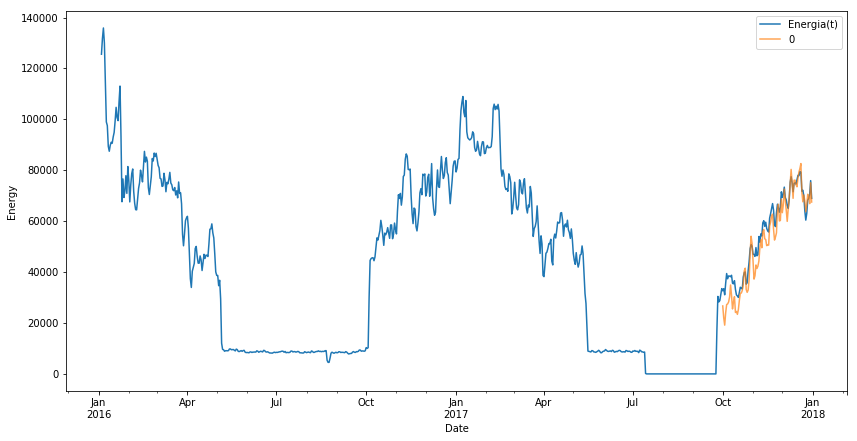

In [24]:
import matplotlib.pyplot as plt

ax = df['Energia(t)'].plot(figsize=(14, 7))
y_pred_df.plot(ax=ax, label='Predykcja', alpha=.7, figsize=(14, 7))

ax.set_xlabel('Date')
ax.set_ylabel('Energy')
plt.legend()

plt.savefig('wykres.jpg')
plt.show()

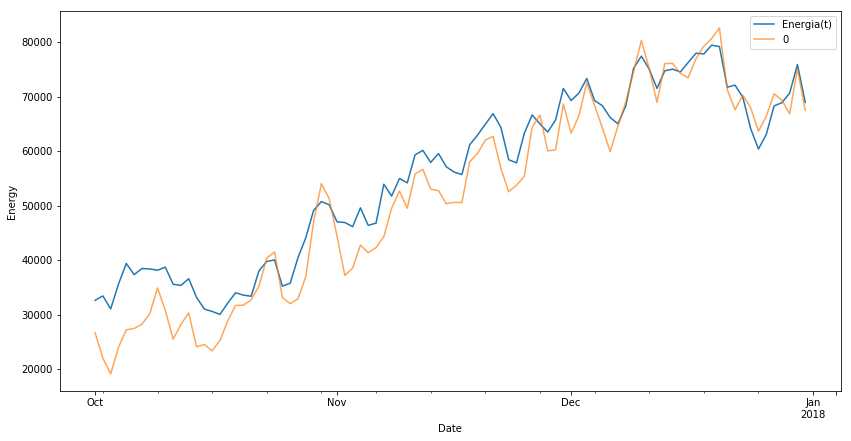

In [25]:
ax = df['Energia(t)'].loc['2017-10-01':].plot(figsize=(14, 7))
y_pred_df.plot(ax=ax, label='Predykcja', alpha=.7, figsize=(14, 7))

ax.set_xlabel('Date')
ax.set_ylabel('Energy')
plt.legend()

plt.savefig('wykres.jpg')
plt.show()